In [1]:
# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 4.1 선형 회귀
1장에서 본 삶의 만족도에 대한 간단한 선형 회귀 모델 <br>
삶의 만족도 = b + w * 1인당GDP <br>

일반적인 선형 모델은 입력 특성의 가중치와 편향이라는 상수를 더해 예측을 만든다. <br>
예측값 (y hat) = 편향 + 파라미터1* 1번째특성 + 파라미터2* 2번째 특성 + ... + 파라미터n* n번째 특성

예측값 = 가설(x) = 파라미터벡터 dot X <br>
예측값 = 파라미터벡터전치 * X

## 4.1.1 정규 방정식
비용함수를 최소화 하는 파라미터를 찾기위한 해석적인 방법 <br>
$$
\hat{\boldsymbol{\theta}}=\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1} \mathbf{X}^{T} \mathbf{y}
$$

이 공식을 테스트

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

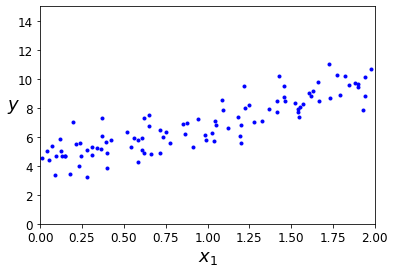

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [14]:
# 정규방정식을 사용해 theta_best 계산
# np.linalg에 있는 inv()함수를 사용해 역행렬을 계산하고 dot() 메서드를 사용해 행렬곱
print(X[:3])
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가
print(X_b[:3])


[[0.74908024]
 [1.90142861]
 [1.46398788]]
[[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]]


In [15]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

4.125와 2.7이 아닌 4와 3을 기대 했지만 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못함

In [16]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

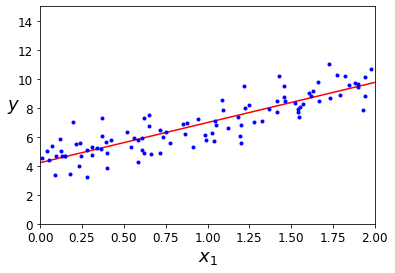

In [17]:
# 모델의 예측을 그래프에 표현하면
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [18]:
# 사이킷 런에서 선형 회귀를 수행하면
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [19]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [20]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

LinearRegression 클래스는 scipy.linalg.lstsq()함수(최소제곱)를 기반으로 한다. <br>
이 함수를 직접 호출할 수 있다.

In [21]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [22]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

## 4.1.2 계산 복잡도
정규 방적식은 (n+1) x (n+1) 크기가 되는 XT, X의 역행렬을 계산한다 (n은 특성 수) 역행렬을 계산하는 계산 복잡도는 
$$
O\left(n^{2,4}\right) \text { 에서 } O\left(n^{3}\right)
$$
SVD 방법은 
$$
O\left(n^{2}\right)
$$

# 4.2 경사 하강법 (GD)
훈련 샘플이 매우 많아 메모리에 모두 담을 수 없을 때 적합 <br>
비용함수를 최소화하기 위해 반복해서 파라미터를 조정해가는것 <br>
theta를 임의의 값으로 시작해 조금씩 비용 함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때 까지 점진적으로 향상

## 4.2.1 배치 경사하강법
매 반복 마다 전체 데이터셋에 대해 gradients를 구하여 학습하는 방법

In [23]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

## 4.2.2 확률적 경사 하강법(SGD)
- 매 스탭에서 한개의 샘플을 무작위로 뽑고 그 샘플에 대해 gradient 계산
- 하강이 매우 불안정함
    - 파라미터 공간이 매우 복잡할 때 지역 최솟값을 건너뛰게 할 수 있음
    - 최솟값에 안착하지 못함 (learning schedule 사용해서 처음에는 빠르게 그 후에는 느리게 leaning rate 조절)

In [28]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼 파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [29]:
theta

array([[4.18645664],
       [2.78490851]])

In [31]:
# scikit-learn에서 SGD
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
# 최대 1000번 에포크 동안 실행, 0.001 보다 적은 loss가 나오면 stop, 규제(penalty)는 없음 학습률은 0.1로 시작
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [32]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.13110611]), array([2.71045588]))

# 4.2.3 미니배치 경사 하강법
미니 배치라 부르는 임의의 작은 샘플 세트에서 gradients 계산 <br>
확률적 경사 하강법에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어 GPU를 사용해 얻는 성능 향상


# 4.3 다항 회귀
가지고 있는 데이터가 단순한 직선보다 복잡한 형태라면? <br>
비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있다. <br>
간단한 방법은 각 특성의 거듭제곱을 새로운 특성으로 추가하고 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는것

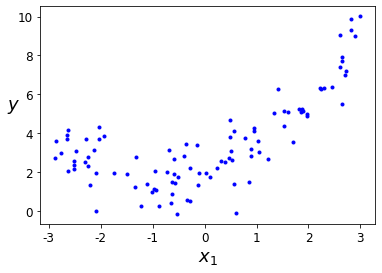

In [35]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [37]:
# 직선으로는 이 데이터를 모델로 표현하기 좋지 않음
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.87439529])

In [38]:
X_poly[0]

array([-2.87439529,  8.2621483 ])

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99459674]), array([[0.87549094, 0.49283827]]))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0, flags=flags)


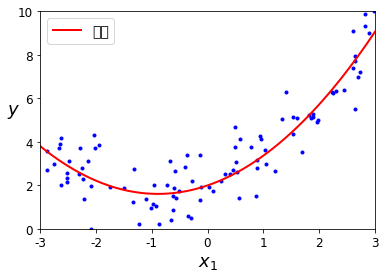

In [51]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="예측")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# 4.4 학습 곡선
고차 다항 회귀를 적용하면 일반적인 선형 회귀에서 보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것 <br>


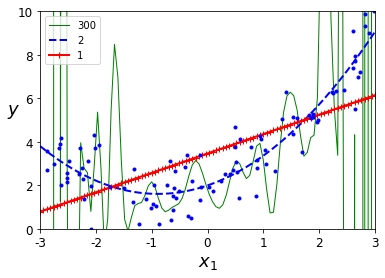

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

300차항 그래프는 심각하게 훈련 데이터에 과대 적합 되어 있다. 반면에 선형 모델은 과소 적합이다. 가장 데이터를 잘 표현한 것은 2차 다항 회귀인데 데이터를 2차방정식으로 생성했기 때문이고 이를 알 수 있는 상황이다. 실제로는 데이터가 어떻게 생성됐는지 알 수 없다. 그러면 얼마나 복잡한 모델을 사용할지 어떻게 정할 수 있을까? <br>

교차 검증을 사용해서 훈련 데이터에 성능이 좋지만 교차 검증 점수가 나쁘면 과대적합 된다는 것을 알 수 있었다. 양쪽 모두 안좋으면 과소 적합이다. <br>

학습 곡선을 살펴 볼 수 있다. 

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.axis([0, 100, 0, 3.0])
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="검증 세트")

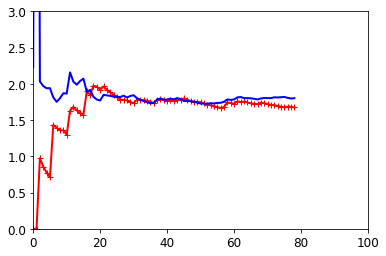

In [66]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

이 학습 곡선은 과소적합된 모델이다. 훈련데이터의 성능을 보면 그래프가 0에서 시작할 때는 오차가 0일 수 밖에 없다. 그 이유는 샘플이 한두개 있기 때문이다. 하지만 훈련 샘플이 추가되면서 잡음 + 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것은 불가능해 진다. 그래서 곡선이 어느 정도 평평해질때까지 계속 오차가 상승한다. 그리고 샘플이 추가되어도 평균 오차가 크게 나아지거나 나빠지지 않는다.  <br>
검증 데이터는 모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화가 될 수 없어서 검증 오차가 매우 크다. 샘플이 추가됨에 따라 학습이 되고 검증 오차가 서서히 감소하지만 비교적 큰 오차 값에서 근접해 있다.

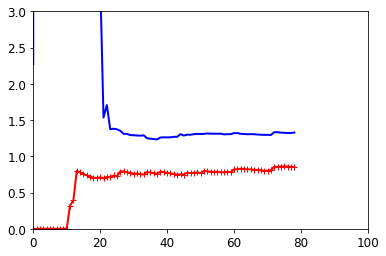

In [67]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

이 학습 곡선은 두가지 차이가 있다.
- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
- 두 곤선 사이에 공간이 잇다. 이 말은 훈련 데이터에서 성능이 더 좋다는 뜻이고 과대적합 모델의 특징이다.
과대적합 모델을 개선하는 한 가지 방법은 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가하는것

# 4.5 규제가 있는 선형 모델
다항 회귀는 다항식을 줄이면 분산이 감소하므로 차수를 줄여서 과대적합을 막고 선형 회귀 모델에서는 릿지, 라쏘, 엘라스틱넷 같은 모델의 가중치를 제한해 분산을 줄인다. 

## 4.5.1 릿지 회귀

In [69]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.80130061]])

In [71]:
# 확률적 경사 하강법을 사용 했을때
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.78913225])

penalty 매개 변수는 사용할 규제를 지정 l2는 SGD가 비용함수에 가중치 벡터의 l2 노름의 제곱을 2로 나눈 규제항을 추가하게 만든다. 릿지랑 같음

## 4.5.2 라쏘 회귀

In [72]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.75554333])

In [73]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.78234085])

## 4.5.3 엘라스틱 넷
릿지 회귀와 라쏘 회귀를 절충한 모델. 규제항은 릿지와 라쏘 회귀의 규제항을 단순히 더해서 사용하며 혼합 정도는 혼합 비율 r을 사용해 조절


In [74]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])


array([4.75902895])

## 4.5.4 Early Stopping

In [77]:
from copy import deepcopy

X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler()),
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [78]:
best_epoch, best_model

(604,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              tol=-inf, warm_start=True))

# 4.6 로지스틱 회귀
어떤 회귀 알고리즘은 분류에서도 사용할 수 있다. 로지스틱 회귀는 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용된다. 추정 확률이 50%가 넘은면 그 샘플이 해당 클래스에 속한다고 예측한다. (positive class)

그래서 선형 회귀와 로지스틱 회귀의 차이점은 무엇이냐 ?
- 선형 회귀와 로지스틱 회귀 모델은 입력 특성의 가중치의 합을 계산한다 하지만 값을 출력하지 않고 로지스틱을 출력한다.


In [80]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [82]:
X = iris["data"][:, 3:] # 꽃잎의 너비
y = (iris["target"] == 2).astype(np.int) # Iris-Virginica면 1 아니면 0

<ipython-input-82-0b408e20dcb7>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int) # Iris-Virginica면 1 아니면 0


In [84]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51086 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeW

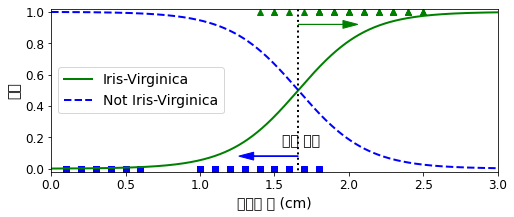

In [85]:
# 꽃잎의 너비가 0~3cm 인 꽃에 대해 모델의 추정 확률을 계산
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] # 결정 경계 

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "결정 경계", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("꽃잎의 폭 (cm)", fontsize=14)
plt.ylabel("확률", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [86]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

<ipython-input-87-f934c518a932>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51086 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:23

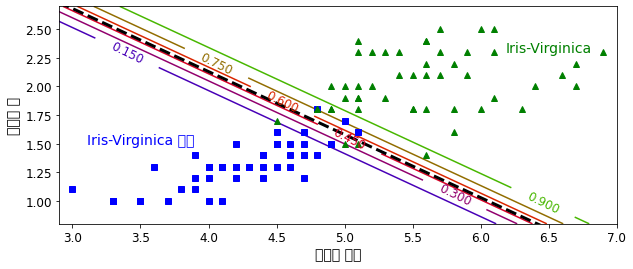

In [87]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver='liblinear', C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Iris-Virginica 아님", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 폭", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()